# Project 1

### King County Housing Market Dataset

<img src="./data/map.png">

    We are a Real Estate Consulting Agency based in King County and we are consulting Developer's who are willing to construct. We will use data find out most common characteristics of houses in the areas and consult the best features of houses. 
    
    After Analyzing data we will use Multivariate Linear Regression model to understand the relationship between house features and price from the data, so when we are consulting developers we have clear understanding of how much money should we sell the house for.
    

#### Questions

1. How people behave in different clusters and segments?  
2. In our chosen area, what houses sell for more and why?
3. What features has the highest correlation with price?


####  Outline
 1. Importing the data
 2. Cleaning the Data
 3. Explanatory Data Analysis
 4. Subsetting for Hypotheses
 5. Multivariate Linear Modeling
 6. Conclusions
 
# Importing the data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
%matplotlib inline

In [13]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [14]:
display(df.isna().sum())
df.dtypes

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

##  Data Cleaning
We are going to follow these steps to get information about our dataset and clean the values that might cause.

1. Find out about missing values
2. Find out other values which might be wrong for the dataset column
3. Find duplicate rows
4. Apply cleaning techniques to those columns

In [17]:
# There are 3 columns with missing values, and one column with unexpected data dtype for the column
# View, waterfront, yr_renovated and sqft_basement for object instead of int64
# a lot of apartments dont have sqft_basement so we can assume that sqft_basement wont have an real impact on this data set
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == '?' else int(float(x)))
# Finding the difference between the house and and the average sqft of 15 neighboots
# Price per sqft
df['price_per_sqft'] = df['price'] / df['sqft_living']
# Fill null values with 0 which most common for hauses
df['yr_renovated'].fillna(0,inplace=True)
# drop 43 rows where there is a categorical data of view
df.dropna(inplace=True)
# fill waterfront nan vals with median: 0
df.waterfront.fillna(0,inplace=True)
# Take out duplicate values
df.drop_duplicates()
df.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
price_per_sqft    0
dtype: int64

In [18]:
for col in df.columns:
    print('Maximum value for column: {} is {}'.format(col, max(df[col])))
    print('Min value for column: {} is {}'.format(col, min(df[col])))
    print('\n\n')

Maximum value for column: id is 9900000190
Min value for column: id is 1000102



Maximum value for column: date is 9/9/2014
Min value for column: date is 1/10/2015



Maximum value for column: price is 7700000.0
Min value for column: price is 78000.0



Maximum value for column: bedrooms is 33
Min value for column: bedrooms is 1



Maximum value for column: bathrooms is 8.0
Min value for column: bathrooms is 0.5



Maximum value for column: sqft_living is 13540
Min value for column: sqft_living is 370



Maximum value for column: sqft_lot is 1651359
Min value for column: sqft_lot is 520



Maximum value for column: floors is 3.5
Min value for column: floors is 1.0



Maximum value for column: waterfront is 1.0
Min value for column: waterfront is 0.0



Maximum value for column: view is 4.0
Min value for column: view is 0.0



Maximum value for column: condition is 5
Min value for column: condition is 1



Maximum value for column: grade is 13
Min value for column: grade is 3



Maximu

In [19]:
# 33 bedrooms drop
df = df[df['bedrooms'] != 33]

## Explatory Data Analysis

We would like to answer some of out questions by visualizing and creating different datasets.
#### Visualization Steps

1. Visualize correlation between columns and price
2. Find most important columns
3. Create clusters and find differences
4. Visualize distribitions of houses
5. Create various pivot tables

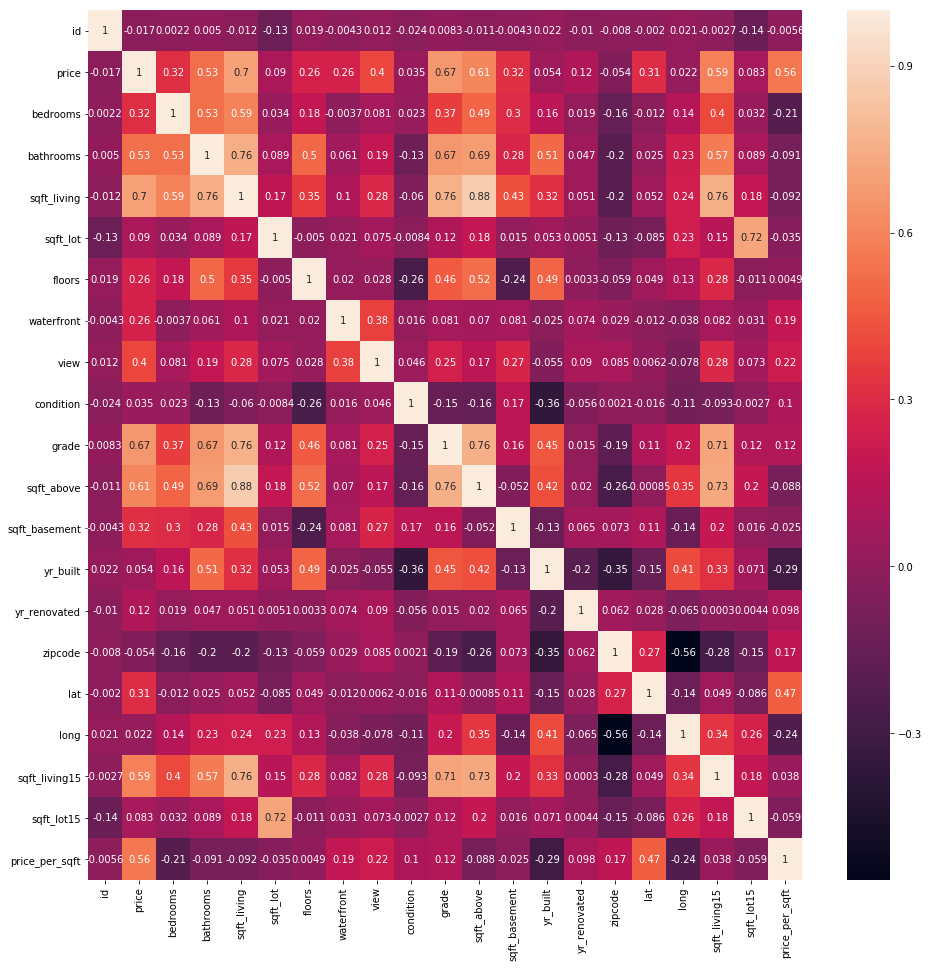

In [20]:
corrmatrix = df.corr()
fig, ax = plt.subplots(figsize=(16,16))         # Sample figsize in inches
s = sns.heatmap(corrmatrix, annot=True, ax=ax)

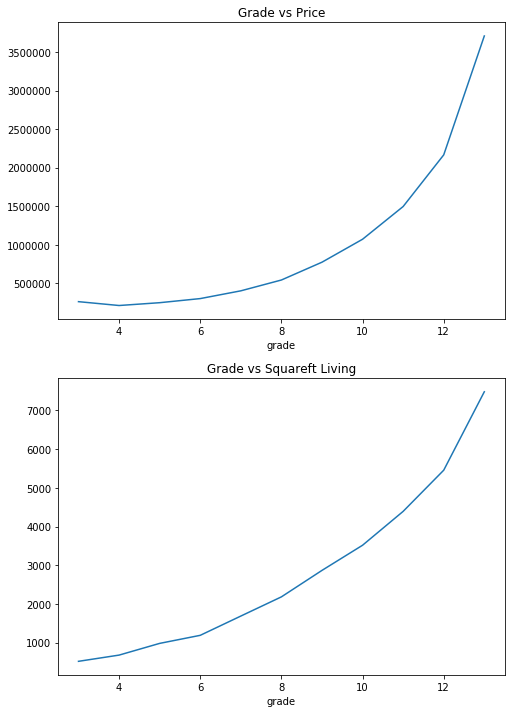

In [35]:
fig = plt.figure(figsize=(8,12))
plt.subplot(211)
df.groupby('grade').mean()['price'].plot()
plt.title('Grade vs Price')
plt.subplot(212)
plt.title('Grade vs Squareft Living')
df.groupby('grade').mean()['sqft_living'].plot()

In [37]:
zips = {}

for r in df['zipcode'].unique():
    mean = df[df['zipcode'] == r]['price_per_sqft'].mean()
    zips[r] = mean

# sort the dictionary from lowest to highest
sorted_zips = sorted(zips.items(), key=lambda kv: kv[1])


In [38]:
zip_cat = []
ranges = [18,36,54,70]
for i in range(0,4):
    for (zip,_) in sorted_zips[i:ranges[i]]:
        zip_cat.append((zip,i))
zip_cat[:5]

[(98023, 0), (98002, 0), (98001, 0), (98032, 0), (98030, 0)]

In [40]:
# Create price band for zipcodes
df['zip_price_band'] = df['zipcode']
for (zipcode,cat) in zip_cat:
    df['zip_price_band'] = df['zip_price_band'].apply(lambda x: cat if x == zipcode else x)

(array([5421., 4751., 6458., 4903.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <a list of 4 Patch objects>)

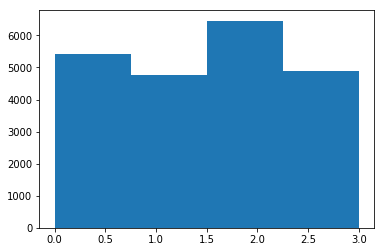

In [41]:
plt.hist(df['zip_price_band'],bins=4)

/Users/kaanbursa/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


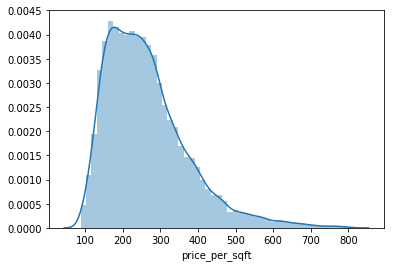

In [42]:
sns.distplot(df['price_per_sqft'])

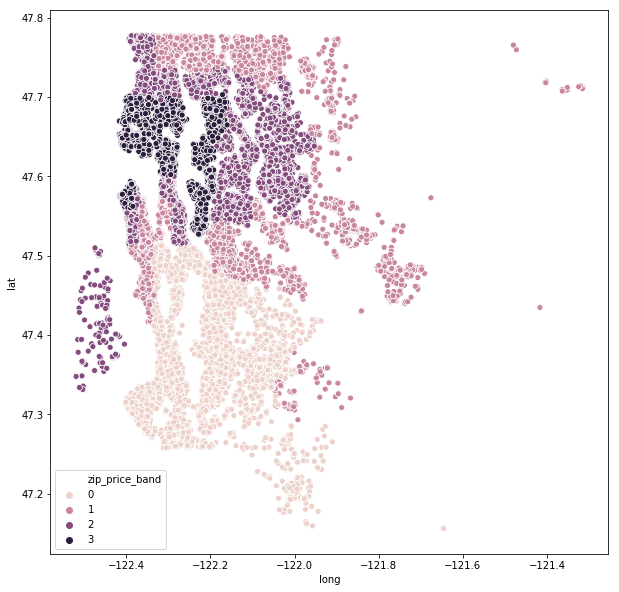

In [43]:
# Check how it is distribute within the are
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(df['long'],df['lat'],ax=ax,hue=df['zip_price_band'])

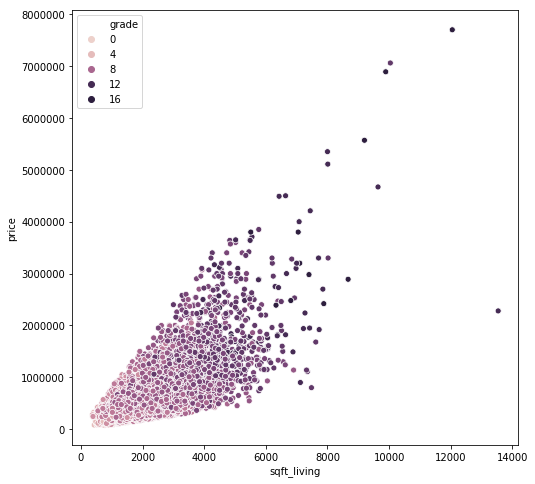

In [45]:
# Check for homoscedasticity
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(df['sqft_living'],df['price'],ax=ax,hue=df['grade'])

### Subsetting for Hypothesis

Pick the category with most houses

In [46]:
zip_mid_up = df[df['zip_price_band'] == 2]

In [47]:
under_val = zip_mid_up[zip_mid_up['price'] <= zip_mid_up.price.mean()]
over_val = zip_mid_up[zip_mid_up['price'] > zip_mid_up.price.mean()]

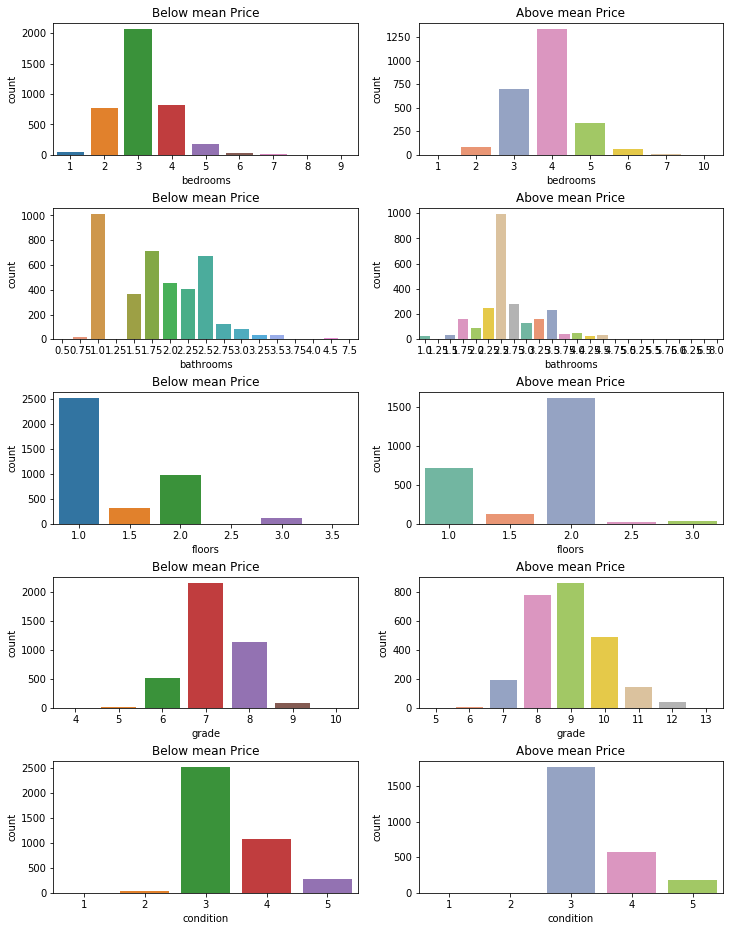

In [48]:
# Plots for discrete datas
disc_columns = ['bedrooms','bathrooms','floors','grade','condition']
fig, ax = plt.subplots(5,2,figsize=(12,16))
plt.subplots_adjust(hspace=0.4)
for i,col in enumerate(disc_columns):
    r = i 
    axes = ax[r][0]
    axes2 = ax[r][1]
    sns.countplot(under_val[col],ax=axes).set_title('Below mean Price')
    sns.countplot(over_val[col],palette="Set2", ax=axes2).set_title('Above mean Price')

Visualize zipcodes

In [49]:
rows = []
cols = list(df.columns)
for z in df.zipcode.unique():
    
    vals = []
    for col in cols:
        if isinstance(df[col][0], int) or isinstance(df[col][0], float):
            vals.append(df[df['zipcode'] == z][col].mean())
        else:
            vals.append(df[col][0])
    rows.append(vals)
zipdf = pd.DataFrame(rows,columns=cols)

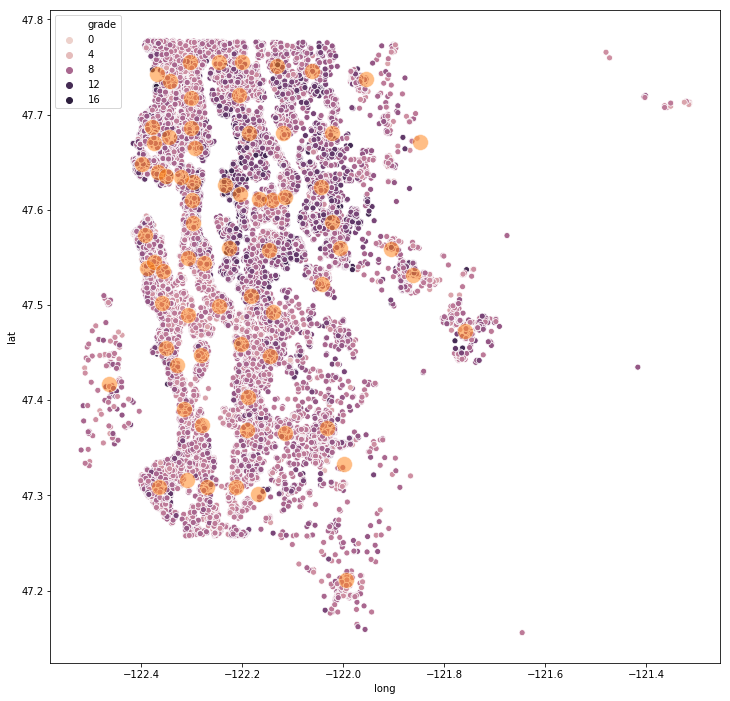

In [50]:
fig = plt.figure(figsize=(12,12))
sns.scatterplot(x='long',y='lat',data=df,hue='grade')
sns.scatterplot(x='long',y='lat',data=zipdf,alpha=0.5,s=250)

## Model

#### Multivariate Linear Regression

In [51]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

In [52]:
columns = (abs(zip_mid_up.corr()) > 0.3)['price']
columns = columns[columns == True]
mlr_df = zip_mid_up[columns.index]

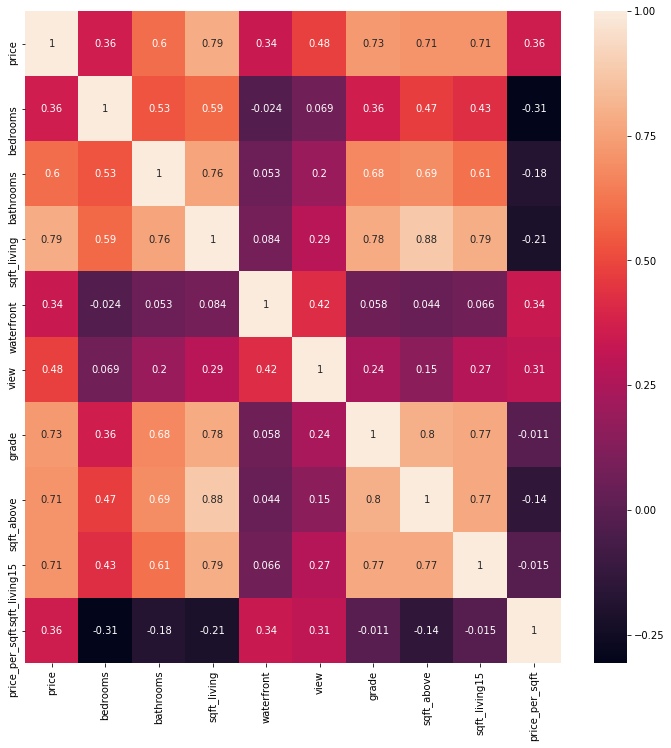

In [53]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(mlr_df.corr(),annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23a419b0>,
      dtype=object)

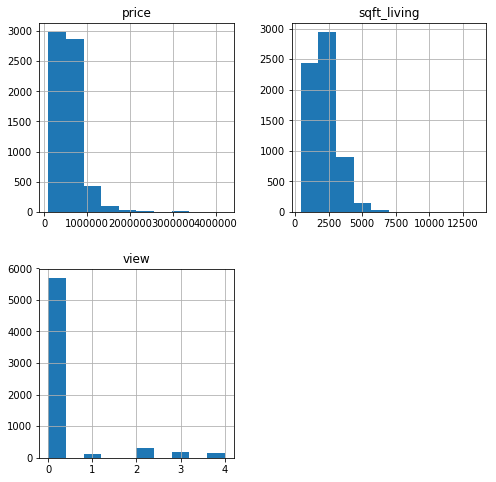

In [55]:
# First took off waterfront from the list ['sqft_living','view','price', 'waterfront', 'bedrooms']
# Changed waterfront because of high p value when fed to the model
# New model requires to drop bedrooms since it has negative coeff
columns_for_model = ['sqft_living','view','price']
mlr_df[columns_for_model].hist(figsize=(8,8))

#### Linear Regression with one variable

In [57]:
preds = '+'.join(columns_for_model[:-1])
outcome = 'price'
f1 = outcome + '~' + preds
model = smf.ols(formula=f1,data=mlr_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     7094.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        14:59:55   Log-Likelihood:                -87223.
No. Observations:                6458   AIC:                         1.745e+05
Df Residuals:                    6455   BIC:                         1.745e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.146e+04   5506.049     11.163      0.000    5.07e+04    7.23e+04
sqft_living   232.4332      2.391     97.199      0.000     227.745     237.121
view         1.012e+05   2667.365     37.939      0.000     9.6e+04    1.06e+05
==============================================================================
Omnibus:                     4893.329   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           257408.166
Skew:                           3.134   Prob(JB):                         0.00
Kurtosis:                      33.287   Cond. No.                     5.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

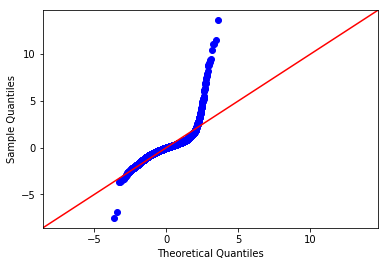

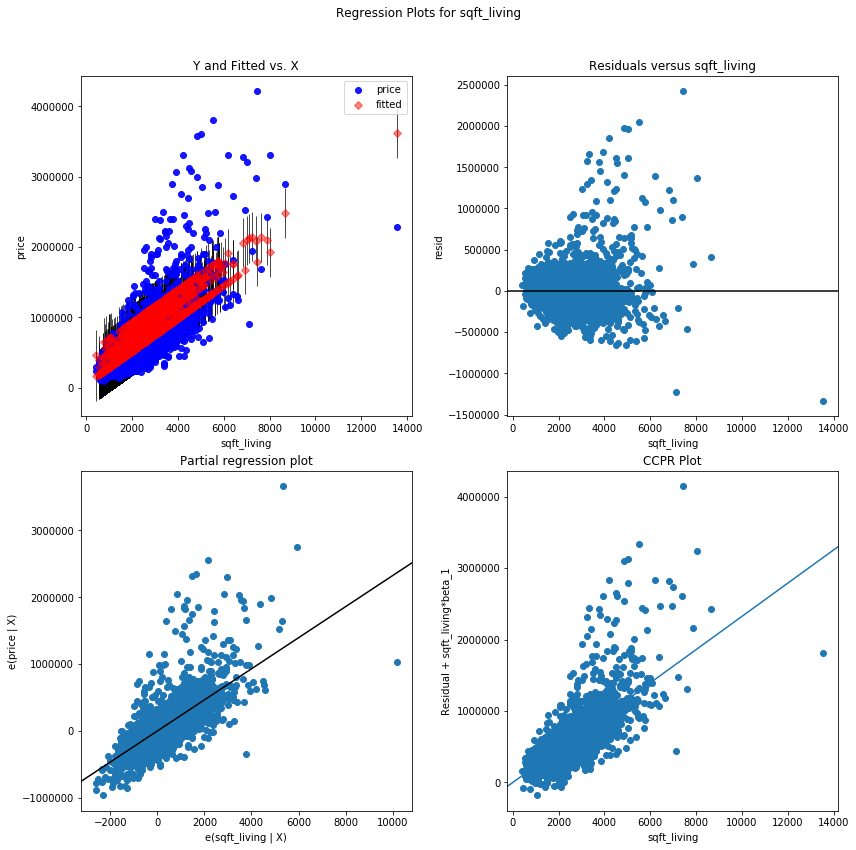

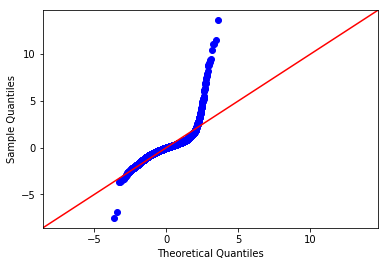

In [58]:
fig = plt.figure(figsize=(12,12))
fig = sm.graphics.plot_regress_exog(model,'sqft_living',fig=fig)
resid = model.resid
sm.graphics.qqplot(resid,dist=stats.norm,line='45',fit=True)

In [59]:
ctest = ['sqft_living','view', 'waterfront', 'bedrooms']
test_df = mlr_df[['sqft_living','view','price', 'waterfront', 'bedrooms']]
for col in ctest:
    f = 'price~'+col
    mod = smf.ols(formula=f,data=test_df).fit()
    print('For formula {}, \nR2 value is {}, \nModel Params are is \n{} \n\n'.format(
        f,mod.rsquared,mod.params
    ))

For formula price~sqft_living, 
R2 value is 0.6175581656845236, 
Model Params are is 
Intercept      34037.487803
sqft_living      258.557531
dtype: float64 


For formula price~view, 
R2 value is 0.2296014471840463, 
Model Params are is 
Intercept    546250.076513
view         175853.483737
dtype: float64 


For formula price~waterfront, 
R2 value is 0.1144485181760434, 
Model Params are is 
Intercept     5.861167e+05
waterfront    1.023242e+06
dtype: float64 


For formula price~bedrooms, 
R2 value is 0.12982524558467556, 
Model Params are is 
Intercept    175099.450862
bedrooms     124170.361872
dtype: float64 




## Conculusion 

There is clear distribution of house valuation in the area. It is wise to focus on the level 3 category with most of the houses are situated. Within that category its clear to see that most of the houses which are above average price are family houses with 4 bedrooms 2 floors 3 bathrooms. Finally, the biggest contributor to the price is square feat of living however its significance decreases and variance increases after 4000sqf which makes it hard for a linear model to predict
